<a href="https://colab.research.google.com/github/afujii/class/blob/main/EpidemicModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The epidemic models　疫学的モデルのシミュレーションを示す。

S: 病気にかかる可能性のある人口、I：今かかっている人、R:回復した人。　回復した人は「免疫」の効果による。

The most common model used in the epidemioloty is SIR( susceptible, infected, and recoverd) 

$\frac{dS}{dt} = -\beta*S*I$

$\frac{dI}{dt} = \beta*S*I -\gamma*I$

$\frac{dR}{dt} = \gamma*I$

We use scipy, library for scientific culclation.

In [ ]:
import scipy
import scipy.integrate

Here X[0] is S, X[1] for I, X[2] for R

第1階　の微分方程式（First Order Differential Equasion）を解く。

In [ ]:
beta = 0.003
gamma = 0.1

def SIR_model(X, t=0):         
        
	y = scipy.array([- beta*X[0]*X[1]
                          ,  beta*X[0]*X[1] - gamma*X[1]
                          , gamma*X[1] ])
	return y

How to use scipy for solving Differencial equation, this is a sipmple example.

In [ ]:
t = scipy.linspace(0, 60, num = 100)                         

X0 = scipy.array([225, 1,0])
X = scipy.integrate.odeint(SIR_model,X0,t)
print(X) # print is not necessary

[[2.25000000e+02 1.00000000e+00 0.00000000e+00]
 [2.24511177e+02 1.41632577e+00 7.24969630e-02]
 [2.23821028e+02 2.00385053e+00 1.75121774e-01]
 [2.22848937e+02 2.83085357e+00 3.20209039e-01]
 [2.21484283e+02 3.99075767e+00 5.24959040e-01]
 [2.19577467e+02 5.60935614e+00 8.13176922e-01]
 [2.16930409e+02 7.85213139e+00 1.21745992e+00]
 [2.13288780e+02 1.09294403e+01 1.78177928e+00]
 [2.08340580e+02 1.50952112e+01 2.56420856e+00]
 [2.01728821e+02 2.06319761e+01 3.63920249e+00]
 [1.93088936e+02 2.78127466e+01 5.09831691e+00]
 [1.82120671e+02 3.68316322e+01 7.04769687e+00]
 [1.68694227e+02 4.77053517e+01 9.60042107e+00]
 [1.52967292e+02 6.01701647e+01 1.28625428e+01]
 [1.35460589e+02 7.36254220e+01 1.69139891e+01]
 [1.17030195e+02 8.71808576e+01 2.17889479e+01]
 [9.87127815e+01 9.98243532e+01 2.74628653e+01]
 [8.14949064e+01 1.10653098e+02 3.38519954e+01]
 [6.61095085e+01 1.19064231e+02 4.08262600e+01]
 [5.29416786e+01 1.24828005e+02 4.82303163e+01]
 [4.20535036e+01 1.28041240e+02 5.590525

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: scipy.linspace is deprecated and will be removed in SciPy 2.0.0, use numpy.linspace instead
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  


For the result visualizations, we use pylab library.

In [ ]:
import pylab as plt

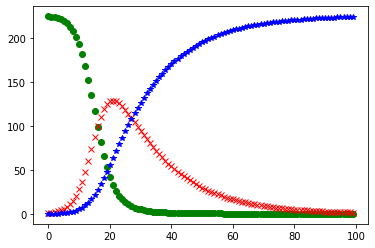

In [ ]:
plt.plot(range(0, 100), X[:,0], 'o', color = "green")
plt.plot(range(0, 100), X[:,1], 'x', color = "red")
plt.plot(range(0, 100), X[:,2], '*', color = "blue")
plt.show()

モデルを拡張して、時間が経つと獲得した免疫を失う、つまり「免疫記憶が薄れる」状況をモデルに反映させる。

$\frac{dS}{dt} = -\beta*S*I+\sigma*R$

$\frac{dI}{dt} = \beta*S*I -\gamma*I$

$\frac{dR}{dt} = \gamma*I - \sigma*R$

In [ ]:
beta = 0.003
gamma = 0.1
sigma = 0.1

def SIRS_model(X, t=0):         
        
	y = scipy.array([- beta*X[0]*X[1] + sigma*X[2]
                          ,  beta*X[0]*X[1] - gamma*X[1]
                          , gamma*X[1] - sigma*X[2]])
	return y

結果を表示する。Results

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: scipy.linspace is deprecated and will be removed in SciPy 2.0.0, use numpy.linspace instead
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  if __name__ == '__main__':


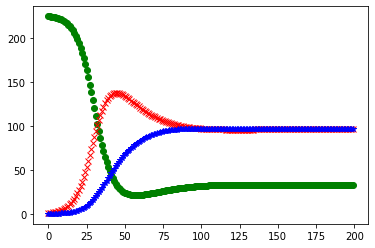

In [ ]:
t = scipy.linspace(0, 60, num = 200)                         

X0 = scipy.array([225, 1,0])
X = scipy.integrate.odeint(SIRS_model,X0,t)
# print(X) # print is not necessary

plt.plot(range(0,200), X[:,0],'o', color='green')
plt.plot(range(0,200), X[:,1],'x', color='red')
plt.plot(range(0,200), X[:,2],'*', color='blue')